In [1]:
import networkx as nx
import dynetx as dn

from tqdm import tqdm_notebook
import pickle
import glob
import itertools
from collections import Counter, defaultdict

import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
# %matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde

In [3]:
from warnings import filterwarnings

In [4]:
pd.set_option('display.max_columns', 55)
filterwarnings('ignore')

In [5]:
def read_pickled_object(filename):
    with open(filename, 'rb') as inp:
        obj = pickle.load(inp)
    return obj

In [6]:
from trajectory_analysis import TemporalNetworkAnalysis

## Tests

### dynetx

[dynetx](https://dynetx.readthedocs.io/en/latest/reference/classes/dynetx.html) library
- inter_event_time_distribution(): ??
- dynamic_G.degree(t=t): distribution of node degrees at t=t
- edge_contribution(i, n): i-n edge persistence data
- dynamic_G.adj\[i\]\[n\] - concrete t at which edge exists between i-n nodes
- dynamic_G.interactions(t=t) - edges existing at t=t

In [58]:
data_list = read_pickled_object('MDTopAnalysis_glucmdc_620K.nxg') # MDTopAnalysis_benzac02mdc MDTopAnalysis_glucmdc MDTopAnalysis_water_md_full

In [59]:
len(data_list)

251

In [60]:
G_list = [data['G'] for data in data_list]

# if there is a change in the course of MD run
G_list_1st_part = G_list[:100]
G_list_2nd_part = G_list[150:]

In [61]:
g = G_list[5]
simple_g = nx.Graph(g)

In [62]:
dynamic_G = dn.DynGraph()
all_edges = []

for i, snapshot_G in enumerate(G_list):
    snapshot_edges = list(snapshot_G.edges(keys=True))
    dynamic_G.add_interactions_from(snapshot_edges, t=i)
    all_edges.extend([(*sorted(e[:2]), e[2]) for e in snapshot_edges])
    # !!! ok for large P1 cells, won't work for small cell with symmetry !!! #

In [87]:
res = []

for g in G_list:
    frame_res = []
    sg = nx.Graph(g)
    for cc in nx.connected_components(sg):
        subg = sg.subgraph(cc)
        prop = nx.kemen(subg)
        # prop = nx.communicability(nx.Graph(subg))
        # frame_res.append(prop)
        frame_res.append(np.mean(list(prop.values())))

    res.append(np.mean(frame_res))

<AxesSubplot:>

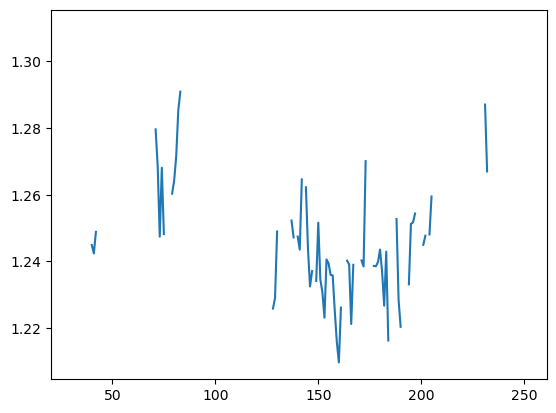

In [88]:
pd.Series(res).plot()

In [77]:
from collections import Counter, defaultdict

In [78]:
counter = Counter(all_edges)

In [124]:
counter.most_common(n=10)

[((16, 19, (0, 0, 0)), 51),
 ((6, 109, (0, 0, 0)), 51),
 ((112, 115, (0, 0, 0)), 51),
 ((120, 139, (0, 0, 0)), 51),
 ((136, 139, (0, 0, 0)), 51),
 ((172, 175, (0, 0, 0)), 51),
 ((0, 3, (0, 0, 0)), 50),
 ((13, 110, (1, 0, 1)), 50),
 ((14, 113, (0, 0, 0)), 50),
 ((14, 117, (0, 0, 0)), 50)]

In [81]:
edges_locations = defaultdict(list)

for edge, count in counter.items():
    n1, n2, t = edge
    n1 = n1 if n1 < n2 else n2
    n2 = n2 if n2 > n1 else n1
    # if 3 in (n1, n2):
    #     print(n1, n2, t, count)
    edges_locations[(n1, n2)].append((edge, count))

In [115]:
selected_edges = []
skipped_edges = []

for nodes_pair, edges_data in edges_locations.items():

    edge_persistence = dynamic_G.edge_contribution(*nodes_pair)

    if edge_persistence < 0.05:
        skipped_edges.append((*edges_data, edge_persistence))
        continue

    if len(edges_data) > 1:
        most_common_edge = sorted(edges_data, key=lambda x: x[1])[-1]
        selected_edges.append([*most_common_edge[0], edge_persistence])
    else:
        selected_edges.append([*edges_data[0][0], edge_persistence])

In [116]:
len(skipped_edges)

294

In [15]:
dynamic_G.coverage()

0.9975490196078431

In [16]:
dynamic_G.density(), dn.density(dynamic_G, t=11),\
dn.density(dynamic_G, t=5), dn.density(dynamic_G, t=0),\
dn.density(dynamic_G)

(0.012371105438573214, 0, 0, 0, 0.048040201005025124)

numbers for glu at 420K < glu at 620K

In [81]:
dynamic_G.interactions_per_snapshots(t=0),\
dynamic_G.interactions_per_snapshots(t=10),\
dynamic_G.interactions_per_snapshots(t=50),\
dynamic_G.interactions_per_snapshots(t=100),\
dynamic_G.interactions_per_snapshots(t=149)

(208.0, 366.0, 388.0, 0, 0)

In [17]:
dynamic_G.uniformity()

0.9951157316401466

In [21]:
g.edges(keys=True)

MultiEdgeView([(0, 3, (0, 0, 0)), (0, 19, (0, 0, 0)), (19, 16, (0, 0, 0)), (1, 17, (0, 0, 0)), (1, 118, (1, 0, 0)), (1, 102, (1, 0, 0)), (17, 118, (1, 0, 0)), (17, 114, (1, 0, 0)), (102, 5, (1, 0, 0)), (2, 105, (0, 0, 0)), (2, 101, (0, 0, 0)), (105, 6, (0, 0, 0)), (101, 18, (0, 0, 0)), (101, 125, (0, 0, 0)), (4, 7, (0, 0, 0)), (4, 84, (0, 0, 0)), (7, 8, (0, 0, 1)), (84, 83, (0, 0, 0)), (84, 87, (0, 0, 0)), (5, 106, (1, 0, 0)), (106, 9, (1, 0, 0)), (6, 109, (0, 0, 0)), (109, 10, (0, 0, 0)), (109, 129, (0, 0, 0)), (109, 189, (0, 0, 0)), (8, 11, (0, 0, 0)), (11, 12, (0, 0, 0)), (9, 110, (1, 0, 0)), (9, 127, (0, 0, 0)), (110, 13, (1, 0, 1)), (127, 29, (0, 0, 0)), (127, 124, (0, 0, 0)), (127, 128, (0, 0, 1)), (10, 113, (0, 0, 1)), (113, 14, (0, 0, 0)), (113, 31, (0, 0, 0)), (12, 15, (0, 0, 0)), (15, 16, (0, 0, 0)), (13, 114, (1, 0, 0)), (13, 131, (0, 0, 0)), (131, 128, (0, 0, 0)), (131, 132, (0, 0, 0)), (14, 117, (0, 0, 0)), (117, 18, (0, 0, 0)), (20, 39, (0, 0, 0)), (39, 36, (0, 0, 0)), (2

In [34]:
dynamic_G.edges(keys=False)

In [63]:
res = []

for e in dynamic_G.edges:
    contribution = dynamic_G.edge_contribution(*e)
    if contribution > 1.0:
        print(e, contribution)
    res.append((e, contribution))

<AxesSubplot:>

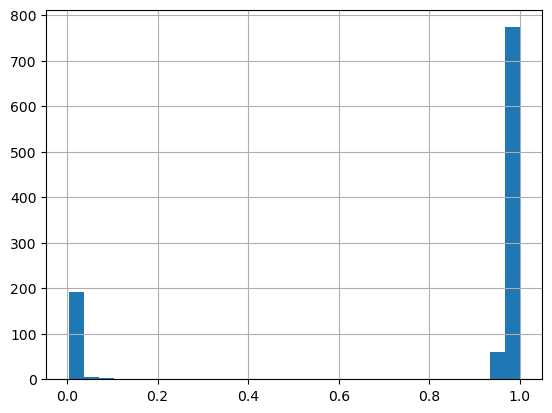

In [64]:
pd.DataFrame(res, columns=['edge', 'p']).sort_values(by='p', ascending=False)['p'].hist(bins=30) # 295K

<AxesSubplot:>

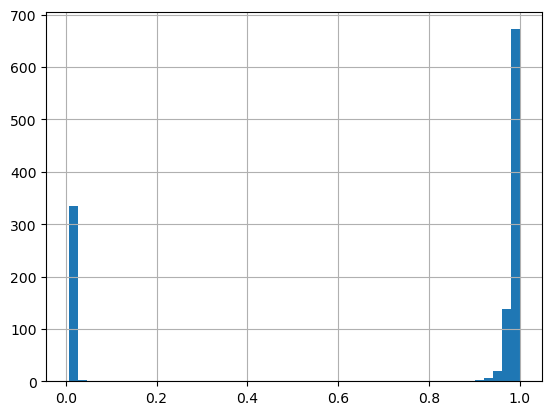

In [10]:
pd.DataFrame(res, columns=['edge', 'p']).sort_values(by='p', ascending=False)['p'].hist(bins=50) # 420K

<AxesSubplot:>

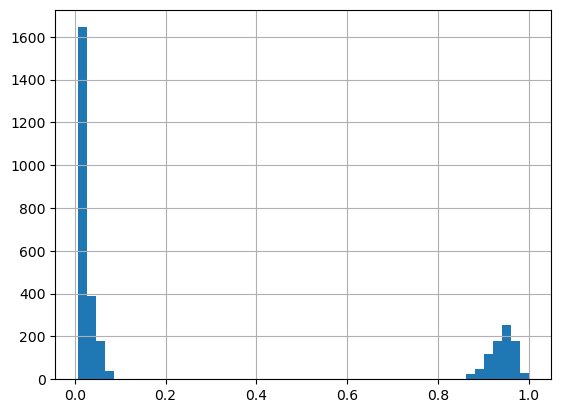

In [17]:
pd.DataFrame(res, columns=['edge', 'p']).sort_values(by='p', ascending=False)['p'].hist(bins=50) # 620K

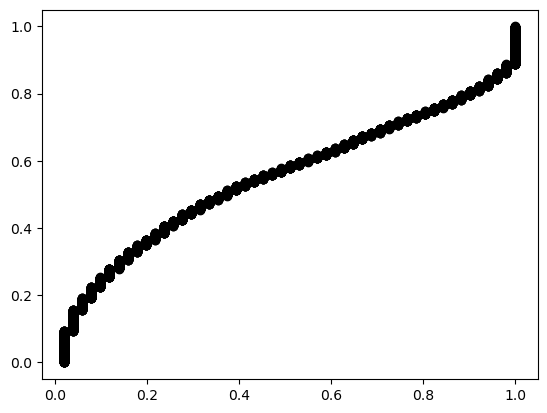

In [185]:
df = pd.DataFrame(res, columns=['edge', 'p'])
data_sorted = np.sort(df['p'].values)

# _ = plt.hist(data_sorted, bins=100, density=True, cumulative=True, label='CDF',
#          histtype='step', alpha=0.8, color='k')

data_sorted = np.sort(data_sorted)
y = np.arange(len(data_sorted)) / len(data_sorted)
plt.plot(data_sorted, y, 'ok-')

# plt.legend()

In [53]:
n1, n2 = 0, 42
n3, n4 = 0, 42

In [54]:
dynamic_G.adj[n1][n2]

KeyError: 0

In [39]:
dynamic_G.edge_contribution(n1, n2), dynamic_G.edge_contribution(n3, n4)

(0.08191808191808192, 0.08191808191808192)

In [40]:
dynamic_G.inter_event_time_distribution(n1, n2), dynamic_G.inter_event_time_distribution(n3, n4)

({25: 1,
  1: 14,
  2: 7,
  12: 2,
  9: 2,
  7: 3,
  16: 2,
  14: 3,
  30: 1,
  22: 1,
  4: 3,
  5: 3,
  3: 2,
  17: 3,
  36: 1,
  10: 3,
  6: 3,
  53: 2,
  31: 1,
  18: 3,
  8: 2,
  13: 3,
  27: 1,
  11: 1,
  26: 1,
  35: 1,
  45: 1,
  41: 1,
  24: 1,
  44: 1,
  50: 1,
  19: 1},
 {25: 1,
  1: 14,
  2: 7,
  12: 2,
  9: 2,
  7: 3,
  16: 2,
  14: 3,
  30: 1,
  22: 1,
  4: 3,
  5: 3,
  3: 2,
  17: 3,
  36: 1,
  10: 3,
  6: 3,
  53: 2,
  31: 1,
  18: 3,
  8: 2,
  13: 3,
  27: 1,
  11: 1,
  26: 1,
  35: 1,
  45: 1,
  41: 1,
  24: 1,
  44: 1,
  50: 1,
  19: 1})

In [65]:
len(dynamic_G), len(G_list), len(dynamic_G.nodes())

(168, 251, 168)

In [66]:
dt_distribution = []
max_t = len(G_list)

for i in range(g.number_of_nodes()):
    for n in dynamic_G.adj[i]:
        dt = dynamic_G.inter_event_time_distribution(i, n)
        if len(dt) == 0: #  or max_t in dt.keys()
            continue # dt = {0: 1}
        # if max(dt.keys()) > 149:
        #     print(i, n, dt)
        dt_distribution.extend([(k, )*v for k, v in dt.items() if v != max_t])

In [67]:
dt_distribution = tuple(itertools.chain(*dt_distribution))

In [ ]:
dt_distribution

In [68]:
max(dt_distribution)

250

In [69]:
dt_distribution = pd.Series(dt_distribution).value_counts()

Text(0, 0.5, 'count')

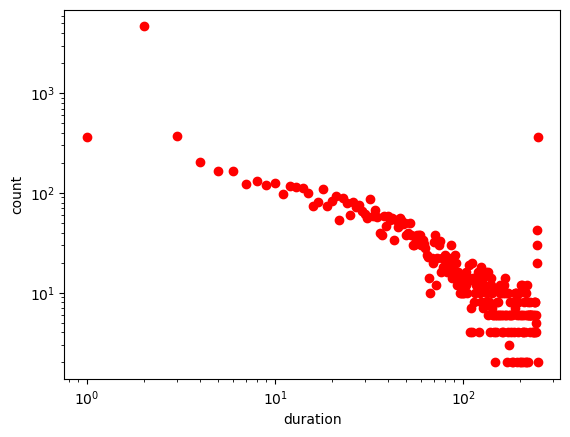

In [70]:
# x, y = dt_distribution_s_HD.index, dt_distribution_s_HD.values
# plt.plot(x, y, 'or')

# x, y = dt_distribution_s_LD.index, dt_distribution_s_LD.values
# plt.plot(x, y, 'ok')

x, y = dt_distribution.index, dt_distribution.values
plt.plot(x, y, 'or')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('duration')
plt.ylabel('count')

In [74]:
i = 0
for n in dynamic_G.adj[i]:
    c = dynamic_G.edge_contribution(i, n)
    dt = dynamic_G.inter_event_time_distribution(i, n)
    print(dynamic_G.adj[i][n])
    print('edge', f'{i}-{n} persistence: {c} |', 'dt:', dt, '\n')

{'t': [[0, 250]]}
edge 0-58 persistence: 1.0 | dt: {250: 1} 

{'t': [[0, 250]]}
edge 0-141 persistence: 1.0 | dt: {250: 1} 

{'t': [[0, 33], [35, 89], [91, 123], [125, 250]]}
edge 0-82 persistence: 0.9880478087649402 | dt: {33: 1, 2: 3, 54: 1, 32: 1, 125: 1} 

{'t': [[0, 8], [10, 64], [66, 76], [79, 114], [116, 127], [129, 157], [159, 203], [205, 215], [217, 250]]}
edge 0-55 persistence: 0.9641434262948207 | dt: {8: 1, 2: 7, 54: 1, 10: 2, 3: 1, 35: 1, 11: 1, 28: 1, 44: 1, 33: 1} 

{'t': [[0, 28], [30, 39], [42, 167], [169, 250]]}
edge 0-111 persistence: 0.9840637450199203 | dt: {28: 1, 2: 2, 9: 1, 3: 1, 125: 1, 81: 1} 

{'t': [[0, 1], [3, 250]]}
edge 0-86 persistence: 0.9960159362549801 | dt: {1: 1, 2: 1, 247: 1} 

{'t': [[0, 1], [3, 250]]}
edge 0-87 persistence: 0.9960159362549801 | dt: {1: 1, 2: 1, 247: 1} 

{'t': [[0, 89], [91, 250]]}
edge 0-110 persistence: 0.9960159362549801 | dt: {89: 1, 2: 1, 159: 1} 

{'t': [[0, 108], [110, 250]]}
edge 0-29 persistence: 0.9960159362549801 | dt:

In [86]:
pd.Series(dynamic_G.degree(t=250)).value_counts()

10    145
9      20
11      2
8       1
Name: count, dtype: int64

In [ ]:
dynamic_G.interactions(t=5)

# Analysis

In [7]:
def plot_graph_mpl(G):

    # Get node coordinates and edge weights for contacts inside the cell only
    node_positions = {node: data['coordinates'] for node, data in G.nodes(data=True)}
    edges = [(node1, node2, data)
             for node1, node2, translation, data in G.edges(data=True, keys=True)
             if translation == (0, 0, 0)]

    # Create 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot nodes with annotations
    for node, pos in node_positions.items():
        ax.scatter(pos[0], pos[1], pos[2], color='navy', s=120)
        ax.text(pos[0], pos[1], pos[2], str(node), color='white', fontsize=9, ha='center',
                # bbox=dict(facecolor='white', edgecolor='none', alpha=0.85)
               )

    # Plot edges with varying widths based on weight attribute
    for edge in edges:
        node1, node2, data = edge
        pos1 = node_positions[node1]
        pos2 = node_positions[node2]
        weight = data['weight']
        ax.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], [pos1[2], pos2[2]], linewidth=5*weight, color='black')

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Scatter Plot with Edges')

In [15]:
def plot_node_characteristics(df, rolling_mean_periods=15):

    N_FRAMES = df['frame'].unique()

    df_vdp_mean_std = df.groupby('frame')[
        ['neighbours_SA_CV', 'N_direct_neighbours', 'N_indirect_neighbours', 'N_neighbours', 'MCN']
    ].agg(['mean', 'std'])

    for descriptor in ['neighbours_SA_CV', 'N_direct_neighbours', 'N_indirect_neighbours', 'N_neighbours', 'MCN']:
        plt.figure(figsize=(9, 4))
        plt.title(descriptor)
        plt.grid(visible=True, axis='y', color='k', linestyle='--', linewidth=0.5)
        plt.plot(df_vdp_mean_std[(descriptor, 'mean')], alpha=0.8, label='mean')
        plt.plot(df_vdp_mean_std[(descriptor, 'mean')].rolling(rolling_mean_periods).mean(),
                 color='k', alpha=1.0, label=f'moving average ({rolling_mean_periods})')
        plt.fill_between(
            N_FRAMES,
            df_vdp_mean_std[(descriptor, 'mean')] - df_vdp_mean_std[(descriptor, 'std')],
            df_vdp_mean_std[(descriptor, 'mean')] + df_vdp_mean_std[(descriptor, 'std')],
            alpha=0.25,
            label='+/-std'
        )
        plt.xlim(N_FRAMES.min() - 5, N_FRAMES.max() + 5)
        plt.xlabel('frame')
        plt.ylabel(descriptor)
        plt.legend()
        plt.show()

In [25]:
system = 'py1mdc'
data_list = read_pickled_object(f'MDTopAnalysis_{system}.nxg') # py1mdc glucmdc glucmdc_620K

In [26]:
tn_analysis = TemporalNetworkAnalysis(data_list)

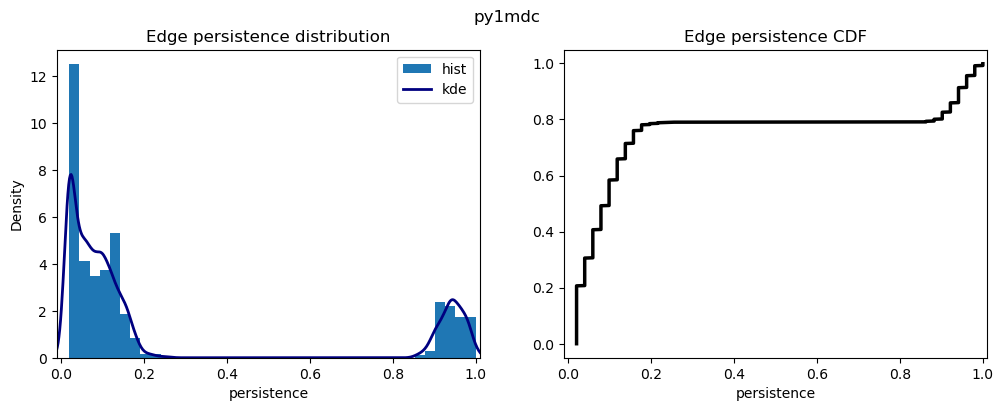

In [27]:
tn_analysis.show_edge_contribution_info(return_persistence_df=False, plot_edge_weigts=True, title=system)

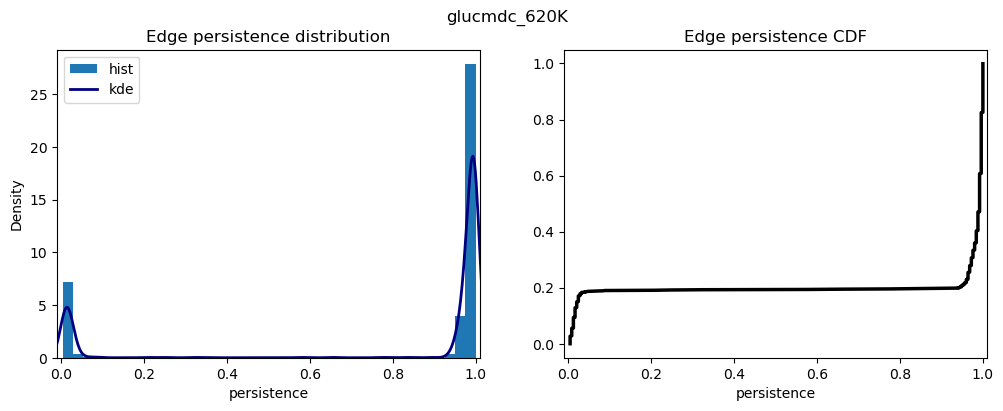

In [12]:
tn_analysis.show_edge_contribution_info(return_persistence_df=False, plot_edge_weigts=True, title=system)

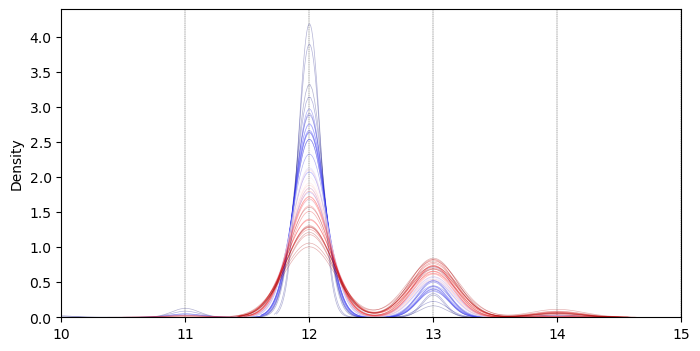

In [28]:
gb = tn_analysis.node_characteristics.groupby('frame')['N_neighbours']
palette = sns.color_palette("seismic", n_colors=len(gb))

fig, ax = plt.subplots(figsize=(8, 4))
# Plot distributions with different colors
for i, (frame, group) in enumerate(gb):
    sns.kdeplot(group.values, color=palette[i], lw=.5, alpha=0.3, ax=ax)

ax.set_xlim(10, 15)
_ = ax.set_xticks(range(10, 16))
plt.grid(visible=True, axis='x', color='k', linestyle='--', linewidth=.25)

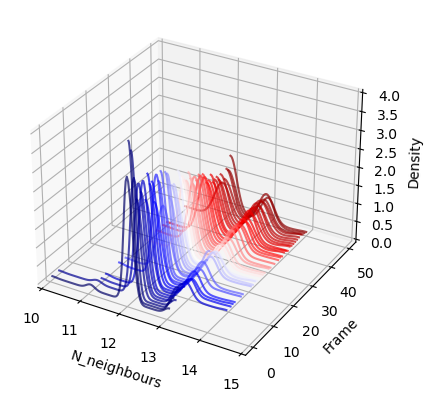

In [31]:
# Group by 'frame'
gb = tn_analysis.node_characteristics.groupby('frame')['N_neighbours']

# Generate a color palette
palette = sns.color_palette("seismic", n_colors=len(gb))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Iterate over the groups and plot each KDE as a slice in the 3D plot
for i, (frame, group) in enumerate(gb):
    # Compute the KDE
    kde = gaussian_kde(group.values)
    x_vals = np.linspace(min(group.values), max(group.values), 100)
    y_vals = kde(x_vals)

    # Plot the KDE as a line in 3D
    ax.plot(x_vals, y_vals, zs=frame, zdir='y', color=palette[i], alpha=0.7, zorder=50-i)

# Set labels
ax.set_xlabel('N_neighbours')
ax.set_ylabel('Frame')
ax.set_zlabel('Density')
ax.set_zlim(0, 4)
ax.set_xlim(10, 15)

plt.show()

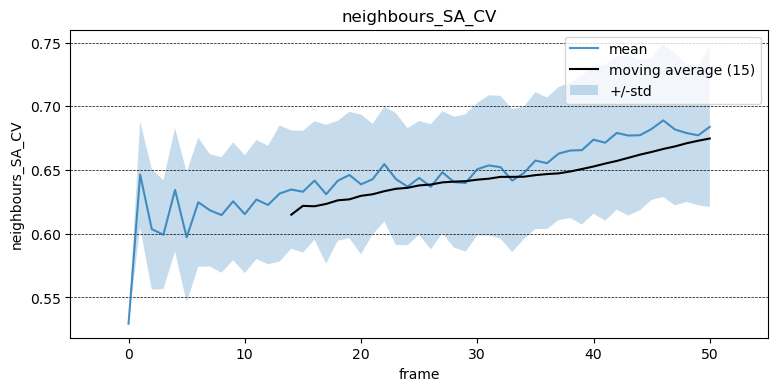

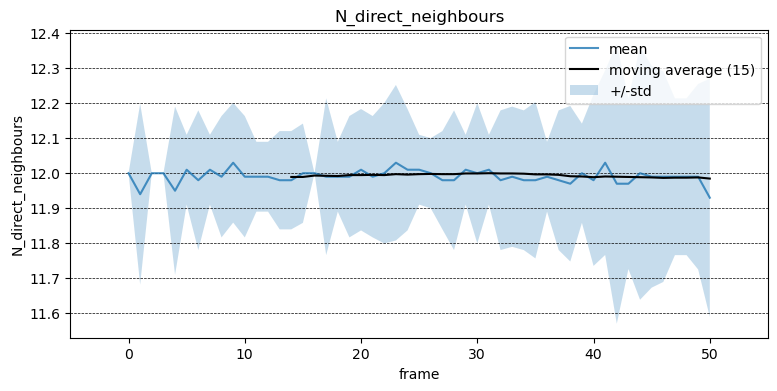

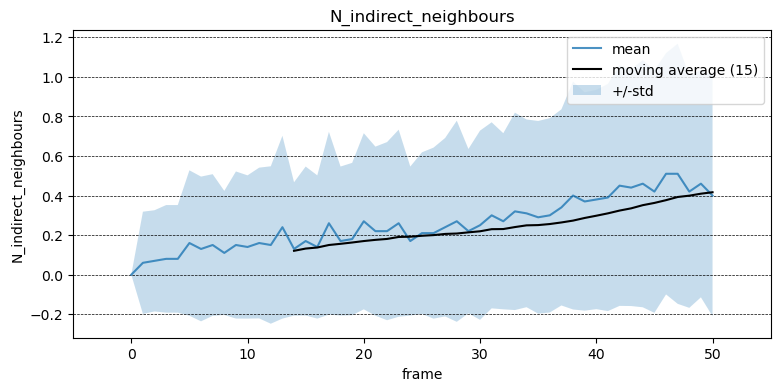

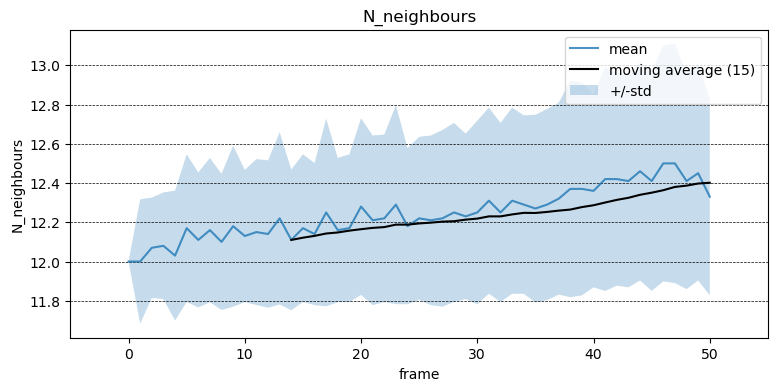

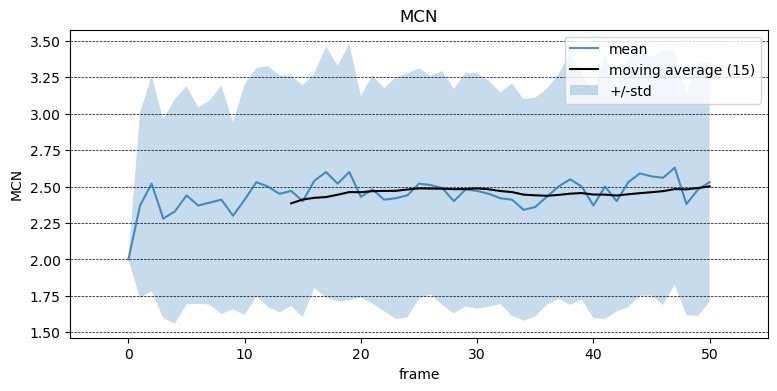

In [33]:
plot_node_characteristics(tn_analysis.node_characteristics, rolling_mean_periods=15) # pyrimidone

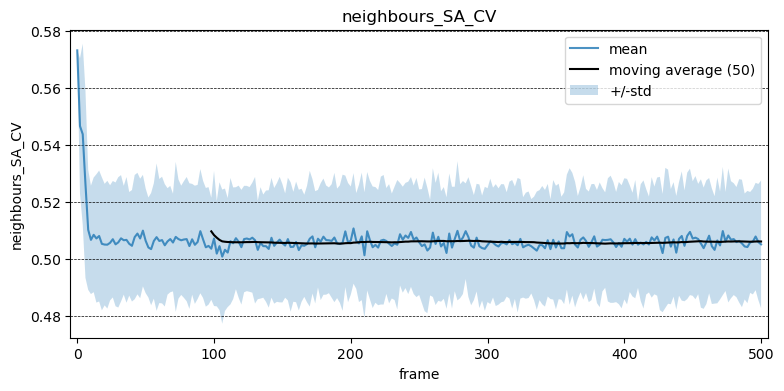

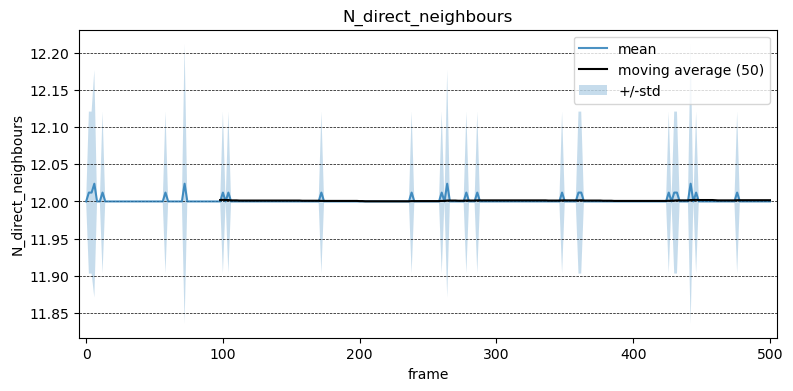

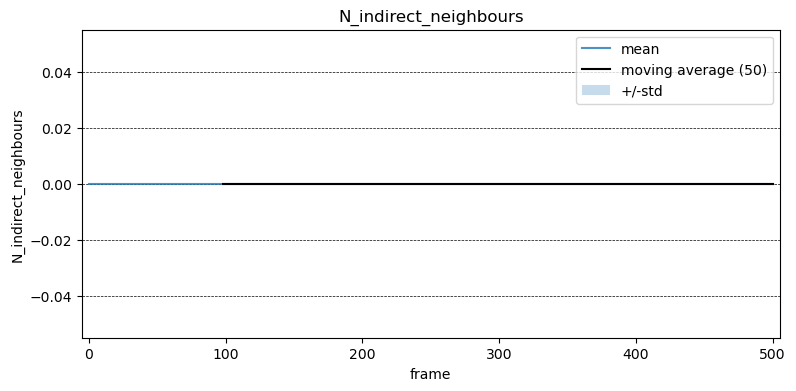

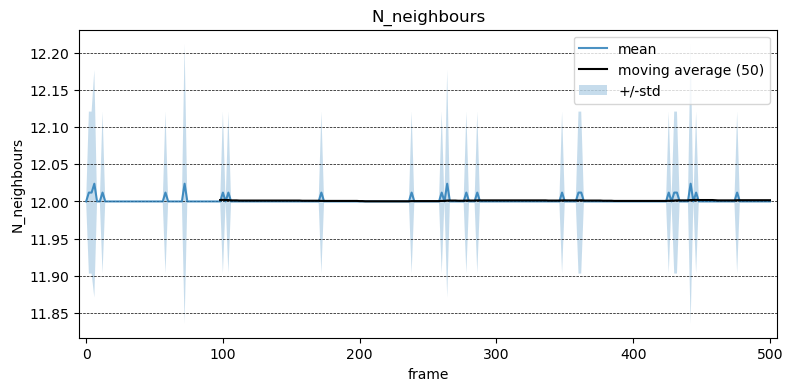

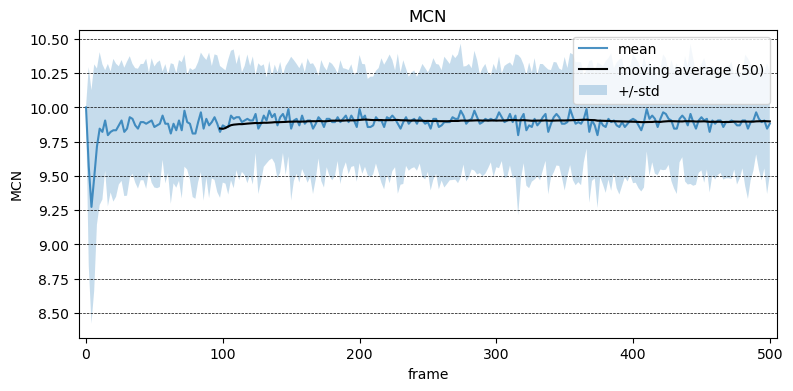

In [16]:
plot_node_characteristics(tn_analysis.node_characteristics, rolling_mean_periods=50) # glucose 620K

In [276]:
fwsG = tn_analysis.get_filtered_weighted_static_graph(edge_weight_threshold=0.91)

In [277]:
len(fwsG.edges(data=True))

166

In [280]:
# df_connectivity = pd.DataFrame(
#     [(*e[:-1], e[-1]['weight']) for e in fwsG.edges(data=True, keys=True)],
#     columns=['node1', 'node2', 'translation', 'persistence']
# )

df_connectivity = pd.DataFrame(tn_analysis._all_edges,
                               columns=['node1', 'node2', 'translation', 'persistence'])

unit_cell = UnitCell({'a': 27.3140, 'b': 29.5600, 'c': 28.5050, 'alpha': 90, 'beta': 90, 'gamma': 90}.values())
nodes = unit_cell.get_fract_coords(cart_coords=np.r_[[v.get('coordinates') for k, v in sorted(fwsG.nodes(data=True))]])

In [284]:
THRESHOLD = 0.01
system = 'pyridone'

fwsG_cif = save_cif_w_connectivity(df_connectivity, unit_cell, nodes, name=f'{system}', persistence_threshold=THRESHOLD)

with open(f"./cifs/{system}_fwsG_{THRESHOLD}.cif", "w") as out:
    out.write(fwsG_cif)

In [283]:
def save_cif_w_connectivity(df_connectivity, unit_cell, nodes, name='FRAME', persistence_threshold=0.91):

    symbols = ['Rn' for i in range(len(nodes))]

    data =  "data_" + f"{name} fwsG persistence threshold {persistence_threshold:.3f}" + '\n'
    data += "_cell_length_a                      " + str(unit_cell.a) + '\n'
    data += "_cell_length_b                      " + str(unit_cell.b) + '\n'
    data += "_cell_length_c                      " + str(unit_cell.c) + '\n'
    data += "_cell_angle_alpha                   " + str(unit_cell.alpha) + '\n'
    data += "_cell_angle_beta                    " + str(unit_cell.beta) + '\n'
    data += "_cell_angle_gamma                   " + str(unit_cell.gamma) + '\n'
    data += "_symmetry_space_group_name_H-M   P1\n"
    data += "_symmetry_Int_Tables_number      1\n"
    data += ("loop_\n"
             + "_space_group_symop.id\n"
             + "_space_group_symop.operation_xyz\n"
             + "1 x,y,z\n")

    data += ("loop_\n"
             + "_atom_site_label\n"
             + "_atom_site_type_symbol\n"
             + "_atom_site_symmetry_multiplicity\n"
             + "_atom_site.fract_x\n"
             + "_atom_site.fract_y\n"
             + "_atom_site.fract_z\n"
             + "_atom_site_occupancy\n")
    for i, s in enumerate(symbols):
        data += (f"{s}{i+1} {s} 1.0 "
                 + '%6.4f' % (nodes[i][0]) + ' '
                 + '%6.4f' % (nodes[i][1]) + ' '
                 + '%6.4f' % (nodes[i][2]) + ' 1.0\n')

    data += ("loop_\n"
             + "_topol_atom.id\n"
             + "_topol_atom.node_id\n"
             + "_topol_atom.atom_label\n"
             + "_topol_atom.element_symbol\n")
    for i, s in enumerate(symbols):
        data += "{} {} {} {} {} {}\n".format(i+1, i+1, s + str(i+1), s, "#",  s + str(i+1))

    data += ("loop_\n"
             + "_topol_node.id\n"
             + "_topol_node.label\n")
    for i, s in enumerate(symbols):
        data += f"{i+1} {s}{i+1}\n"

    df_connectivity = df_connectivity[df_connectivity['persistence'] >= persistence_threshold]
    data += ("loop_\n"
             + "_topol_link.node_id_1\n"
             + "_topol_link.node_id_2\n"
             + "_topol_link.symop_id_1\n"
             + "_topol_link.translation_1_x\n"
             + "_topol_link.translation_1_y\n"
             + "_topol_link.translation_1_z\n"
             + "_topol_link.symop_id_2\n"
             + "_topol_link.translation_2_x\n"
             + "_topol_link.translation_2_y\n"
             + "_topol_link.translation_2_z\n"
             + "_topol_link.type\n"
             + "_topol_link.multiplicity\n")
    for row in df_connectivity.itertuples(index=False):
        data += "{0:<5} {1:<5} 1 0 0 0 1 {2:>2} {3:>2} {4:>2} {5:>3} 1 \n".format(
            row.node1+1, row.node2+1, *[-t for t in row.translation], 'v'
        )

    data += "#End of " + name + '\n'

    return data

In [265]:
class UnitCell:

    def __init__(self, cell_geometry):

        if len(cell_geometry) == 6:
            self.a, self.b, self.c, self.alpha, self.beta, self.gamma = cell_geometry
            self.vectors = self.calc_lattice_vectors(*cell_geometry)
        elif len(cell_geometry) == 3:
            self.a, self.b, self.c, self.alpha, self.beta, self.gamma = self.calc_cell_parameters(cell_geometry)
            self.vectors = np.array(cell_geometry)
        else:
            raise IOError(
                """cell geometry should be specified as a list lengths of cell vectors 
                and angles between them r 3x3 matrix of cell vectors!"""
            )
        self.inv_vectors = np.linalg.inv(self.vectors)
        self.orthogonal = self.is_orthogonal(self.alpha, self.beta, self.gamma)
        self.volume = self.cal_volume(self.vectors)

    @staticmethod
    def is_orthogonal(alpha, beta, gamma, tol=1e-2):

        return all(abs(angle - 90) < tol for angle in (alpha, beta, gamma))

    @staticmethod
    def cal_volume(lattice_vectors):

        return np.dot(lattice_vectors[0], np.cross(lattice_vectors[1], lattice_vectors[2]))

    @staticmethod
    def calc_cell_parameters(lattice_vectors):

        a = np.linalg.norm(lattice_vectors[0])
        b = np.linalg.norm(lattice_vectors[1])
        c = np.linalg.norm(lattice_vectors[2])
        alpha = np.degrees(np.arccos(np.dot(lattice_vectors[1], lattice_vectors[2]) / (b * c)))
        beta = np.degrees(np.arccos(np.dot(lattice_vectors[0], lattice_vectors[2]) / (a * c)))
        gamma = np.degrees(np.arccos(np.dot(lattice_vectors[0], lattice_vectors[1]) / (a * b)))
        return a, b, c, alpha, beta, gamma

    @staticmethod
    def calc_lattice_vectors(a, b, c, alpha, beta, gamma):

        if UnitCell.is_orthogonal:
            vectors = np.array(
                [[a, 0, 0],
                 [0, b, 0],
                 [0, 0, c]]
            )
        else:
            alpha = np.radians(alpha % 180)
            betta = np.radians(beta % 180)
            gamma = np.radians(gamma % 180)
            c1 = c * np.cos(betta)
            c2 = c * (np.cos(alpha) - np.cos(gamma) * np.cos(betta)) / np.sin(gamma)
            c3 = np.sqrt(c * c - c1 * c1 - c2 * c2)
            vectors = np.array([[a, 0., 0.],
                                [b * np.cos(gamma), b * np.sin(gamma), 0.],
                                [c1, c2, c3]])
        return vectors

    def get_cart_coord(self, fract_coords):

        n = len(fract_coords)
        if self.orthogonal:
            cart_coords = fract_coords * np.tile([self.a, self.b, self.c], (n, 1))
        else:
            cart_coords = np.dot(fract_coords, self.vectors)
        return cart_coords

    def get_fract_coords(self, cart_coords):

        n = len(cart_coords)
        cart_coords = np.array(cart_coords)
        if self.orthogonal:
            fract_coords = cart_coords / np.tile([self.a, self.b, self.c], (n, 1))
        else:
            fract_coords = np.dot(cart_coords, self.inv_vectors)
        return fract_coords

## Reading pdb with connectivity

In [118]:
system = 'glucmdc'

In [119]:
with open(f'{system}_connectivity.cif', 'r') as inp:
    content = inp.readlines()

In [120]:
for i, line in enumerate(content):
    if line.startswith('_topol_link.multiplicity'):
        connectivity_data_start_line = i + 1

In [121]:
connectivity_lines = [l.strip() for l in content[connectivity_data_start_line:-1] if ' v ' in l]

In [122]:
vconnectivity = []

for l in connectivity_lines:
    i, j, *_ = l.split()
    # print(i, j, t1, t2, t3, btype)
    i = int(i) - 1
    j = int(j) - 1
    vconnectivity.append((i, j))

In [123]:
len(vconnectivity)

3648

In [124]:
vconnectivity = set(vconnectivity)

In [125]:
with open(f'{system}.vconnectivity', 'wb') as out:
    pickle.dump(vconnectivity, out)